# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Multiple Linear Regression</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Multiple Linear Regression and Regression Error Metrics¶

In [1]:
# y = b0 + b1X1 + b2X2 + b3X3    multiple linear regress.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (8, 4)

import warnings
warnings.filterwarnings("ignore")

## Read Data Set

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation -  EDA

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isnull()

,TV,radio,newspaper,sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [7]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
# !pip install missingno  
# eksik verilerin yapısını ve dagılımını görselleştirir

In [9]:
import missingno as msno

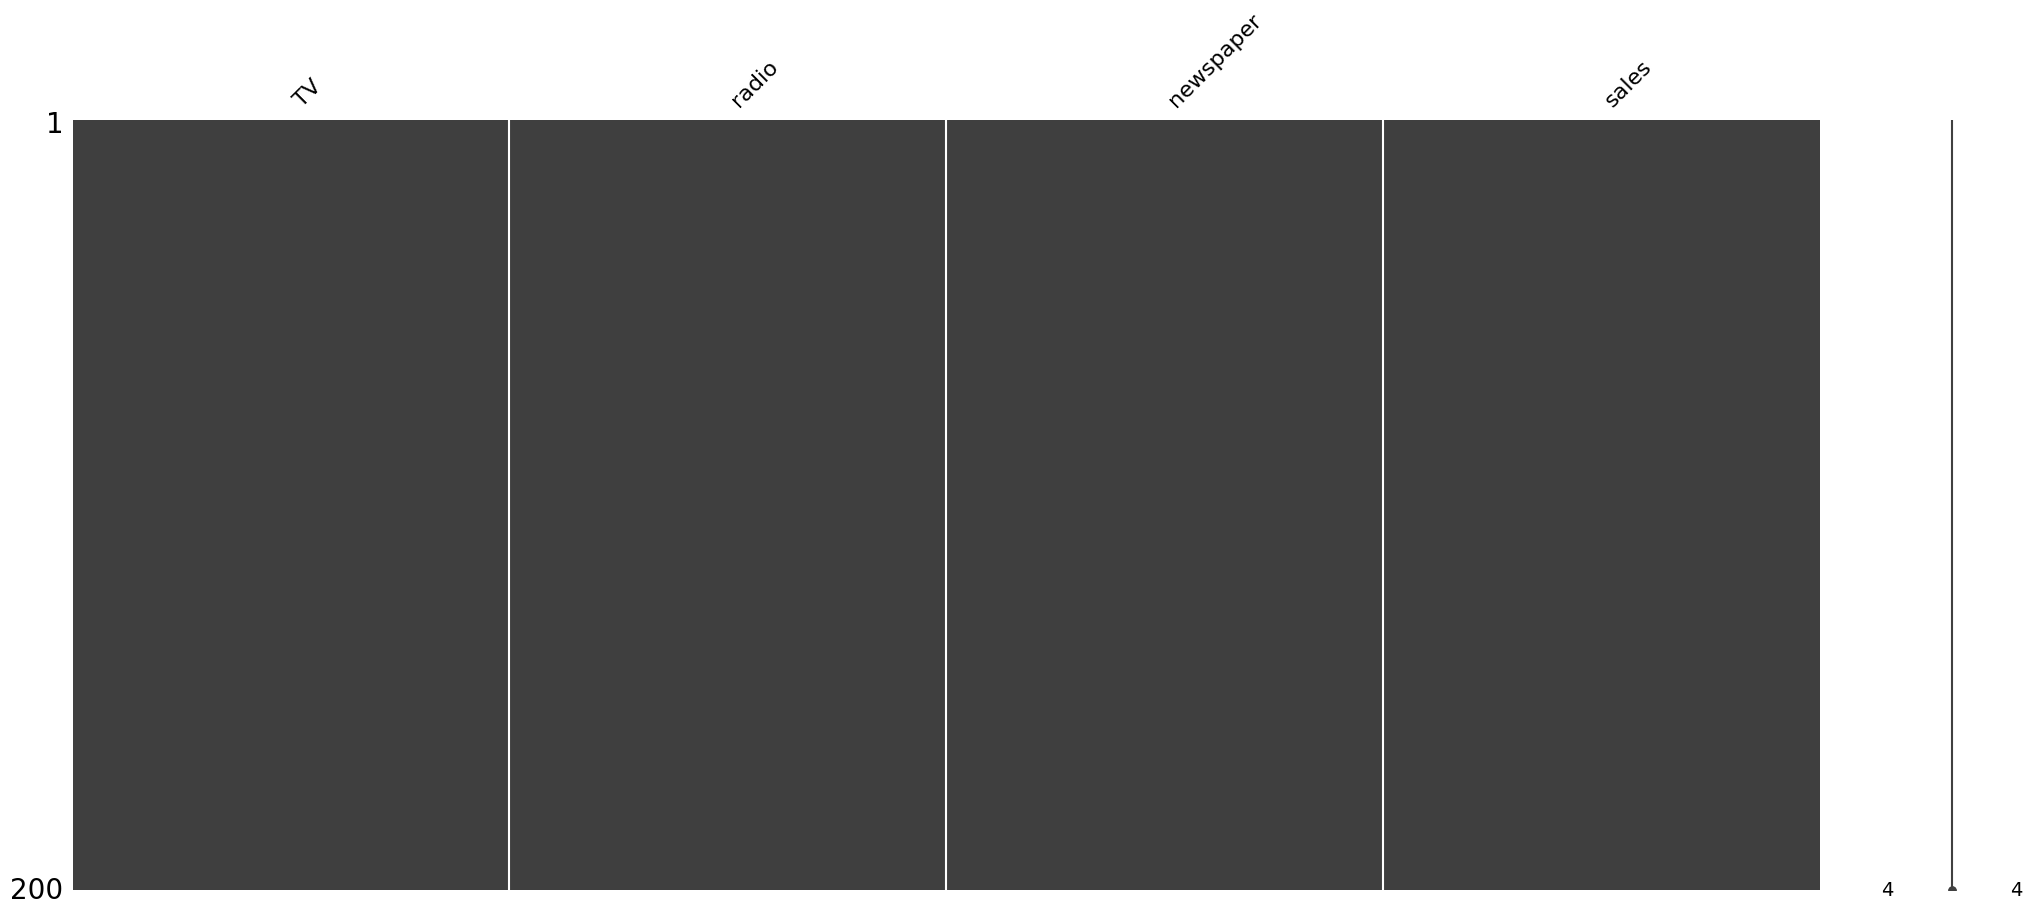

In [10]:
msno.matrix(df);

In [ ]:
# altta örnek null hucreleri olan bir resim (farklı bir data setinden alınmıştır)

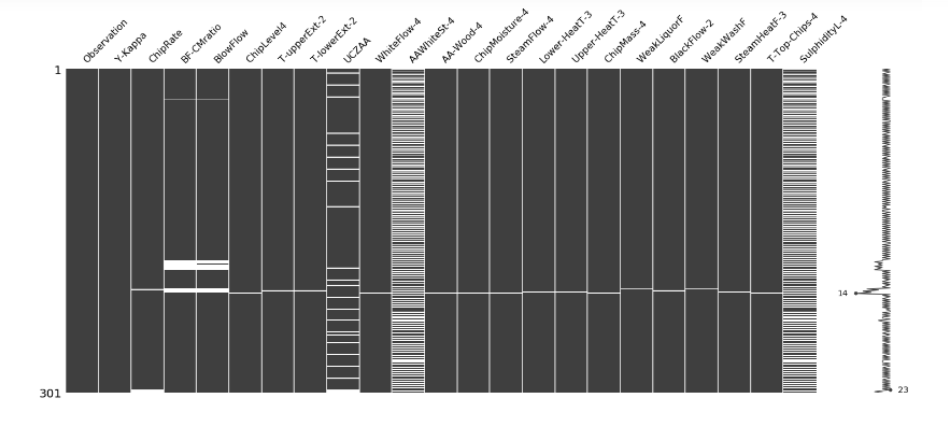

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [12]:
# data setini özetleyen bir kütüphane
#!pip install summarytools

In [13]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,TV[float64],Mean (sd) : 147.0 (85.9)min < med < max:0.7 < 149.8 < 296.4IQR (CV) : 144.4 (1.7),190 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACoUlEQVR4nO3cTY6iQBiA4a+G1qAmEGOiOy8wySxceog57BxhFp7AG7gzMQQj3UQEZjW7bn+qQOurfp91Q2N4Q9cPtmnbVgDf/Xj1BQD3eLv1A8aYkYgMLc9/btv2w/JYWAj1fl0N1Rgzms1mv5Mkmdqc/Hg8ZsaYP75++NCEfL9uPVGHSZJM1+v1R5qm5SMnzvM83mw208PhMBQR7z54oIK9Xzf/9IuIpGlazufzd4vzjyyOgaMQ7xeTKahAqFCBUKECoUIFQoUKhAoVCBUq3LWOiudx3AJNmqYZdHk9viBUj7hugVZVFdd1/bMsy78iYrPg7y2vQw31BYsrrLdARUR2u910u92OL5dL1MfFvZK3oYb8gsUttlugWZZ5uwXqyttQJeAXLPA4n0MVkTBfsPBVXdcDEUmMMban6G245X2oeI6iKAZVVf1aLpdRFEUPj49F+h1uEeoXvttE7nw+v8VxPF6tVuViscgePb7v4RahfuI7T+Qmk4ntUEukx+EWoX6OiZxngg3VcWKQNE0zSNM0YyLnhyBDdZ0YhLzDo1WQobpODFx3eBye5sHu1bsKMtT/bCcGLjs8Lk9znuRfCzrUV3B5moe8V++KUHti8zTXvlfvOIG9uvZMqOiE6wT21tozoaITLkOee9aeew21i7XMji8JPXPY2bo67OktVNYy0aXeQn31WibC0vsY9RVrmQgPX5eGCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChXu+tfoeZ7Hj574dDrFIiJFUcT7/X78zOO1/m6t1+16/D19/QMrB7y1WUnQAQAAAABJRU5ErkJggg=="">",0(0.0%)
2,radio[float64],Mean (sd) : 23.3 (14.8)min < med < max:0.0 < 22.9 < 49.6IQR (CV) : 26.5 (1.6),167 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACsElEQVR4nO3cPW/aQBjA8ecggHmRLYQKG0vHSh088iH6YfsRMvAJMmTpxIaELBBuEMZ2l6ZLWsB3vsSP+//N8YtO/8R3p1NMWZYCNF3no18AuMfDrR8wxgxFpG95/3NZli+W1wJ/XA3VGDOczWbfwjCc2tz8cDgkxpjvxApXt/6i9sMwnK5Wq5coik5Vbrzf74P1ej3d7XZ9ESFUOLn56RcRiaLoNJ/Pf1rcf2hxDfAGiymoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQoW7DqWgGs7w1o9Qa8YZXj8ItX6c4fWAUD3hDG+9Gh0qc73qHMesIyKFw+O9jXljQ2WuV53LmOV53kvT9PNkMvnR6XQym+f7HPPGhirM9WxYj9lms5k+PT19iuP4ebFYJFUf7HvMvYaa53lPREJjjM3lYVEUvSiKEuZ61djMj5MkGYqIjMdj27m1iMcx9xZqmqa9LMu+LpfLbrfbrfTbLSKSZVmQ5/mX0+n0KCK2A4eW8Bbq+Xx+CIJgFMfxyeZT8vtTNLpcLl0f7wddvM9RbT8lr58iQKTZi6kP5bDNExZF0av7ff53hPoXLts8zK39aG2orjsOk8lkvlqtDpbbPMyta9bKUOvacRgMBo+22zyoVytDZcehfVoZ6it2HNqDE/5QodV/UfG+HBewV09eESpq4bqAvXXyilAbpo6DPDW/0l1cFrD3nLwi1AZpw0Eeh9NXVxewhNogbKv9G6E2ENtqb7E9BRUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlS4639P7ff7oOqNj8djICKSpmmw3W5H73m91mdrfW/X6+/p6xfCCaHWusjxaAAAAABJRU5ErkJggg=="">",0(0.0%)
3,newspaper[float64],Mean (sd) : 30.6 (21.8)min < med < max:0.3 < 25.8 < 114.0IQR (CV) : 32.4 (1.4),172 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMywgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/H5lhTAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACY0lEQVR4nO3cPY7aQBiA4W/MgsyCbCEi6GjSp6DkEDlsroDELXIBJGtlxMQI5DhNiCItC3jGTuYbvU+9YyhemZ0f2zRNI0Dokv/9BYBnvDz6A2PMWERGjtc/N01TOY4F/rgbqjFmPJ/Pv2ZZNnO5+OFweDPGfCNW+Hp0Rx1lWTbbbDZVnuenNhcuyzLd7XazoihGIkKo8PLwp19EJM/z02Kx+OFw/bHDGOAdJlNQgVChAqFCBUKFCoQKFZ6a9buq63ooIpkxxvUSbBhARHoM1Vo7vFwuX1ar1WAwGLRag71iwwBXvYV6Pp9f0jR9Xa/Xp+Vy+dZ2PBsG+FuvP/0iIpPJxHWzQIQNA/zGZAoqECpUIFSoQKhQoffJlA/PdVjWYCMSbKi+67CswcYl2FB91mFZg41PsKFeeazDsgYbESZTUIFQoQKhQoXg/0d1xRHDuEQZKkcM4xNlqBwxjE+UoV5xxDAeTKagAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoULUO1M+eF4rLIR6A89rhYdQb+B5rfAQ6h08rxUOJlNQgVChAqFCBUKFCoQKFQgVKhAqVCBUqMCCfw84J9A9Qu0Y5wT6Qagd45xAPwi1J5wT6BaTKajAHTUwvIXwNkINCG8h/BihBoS3EH6MUAPEWwjfYzIFFQgVKhAqVCBUqECoUIFQoQLLU5GJ9YghoUYk5iOGhBoR3yOG2+12URTFJ2PMwfErJCLy03Hs3bv5U6GWZZm2/dTj8ZiKiFhr0/1+//ovx2v97K6+t4uqqrzuxnVdD621n6fT6fckSS5txz+6m/8CVzmUDQaXxEgAAAAASUVORK5CYII="">",0(0.0%)
4,sales[float64],Mean (sd) : 14.0 (5.2)min < med < max:1.6 < 12.9 < 27.0IQR (CV) : 7.0 (2.7),121 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2F

In [14]:
# mean ve Std değerlerinin birbirine yakınlığının outlier tespitindeki önemi hakkında bir örnek

print ( np.mean([100,110,120,115]))
print ( np.std([100,110,120,115]))

111.25
7.39509972887452


In [15]:
print ( np.mean([100,110,120,700]))
print ( np.std([100,110,120,700]))

257.5
255.57533136044253


In [16]:
print ( np.mean([100,110,120,900]))
print ( np.std([100,110,120,900]))

307.5
342.153109002388


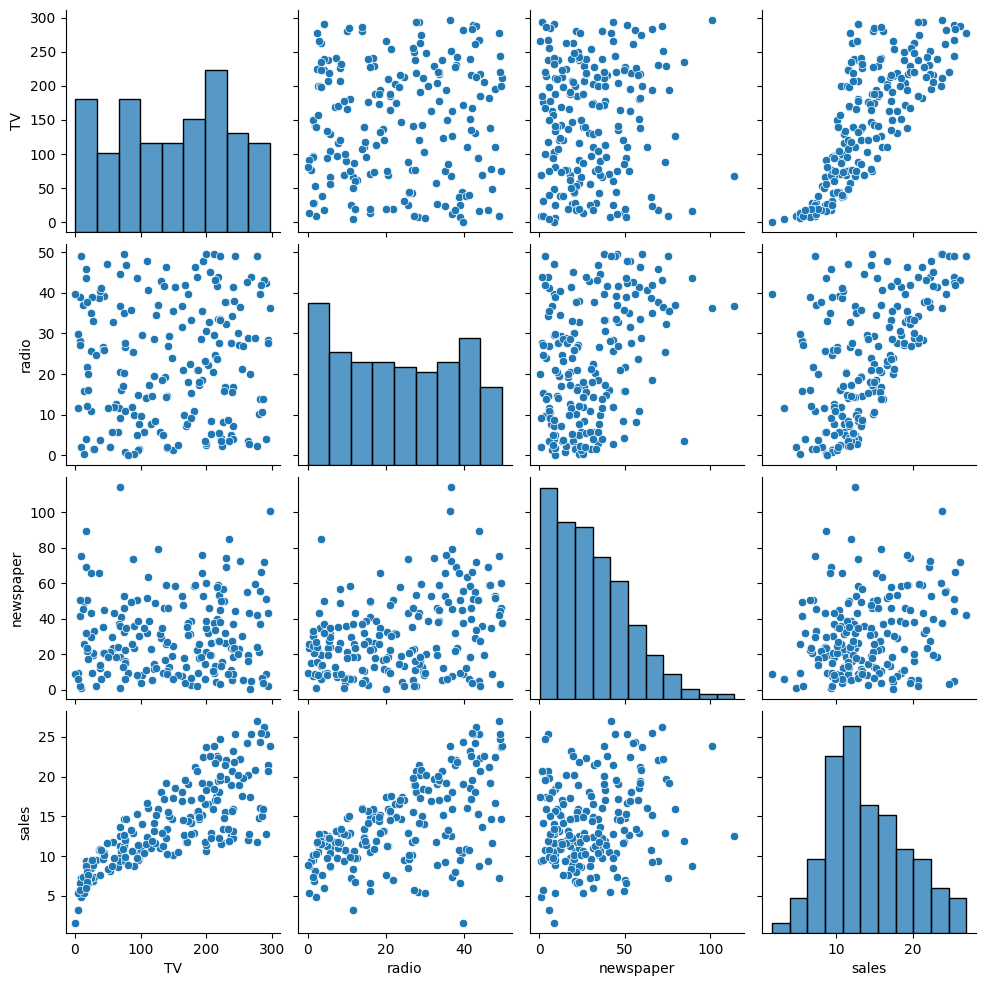

In [17]:
sns.pairplot(df);

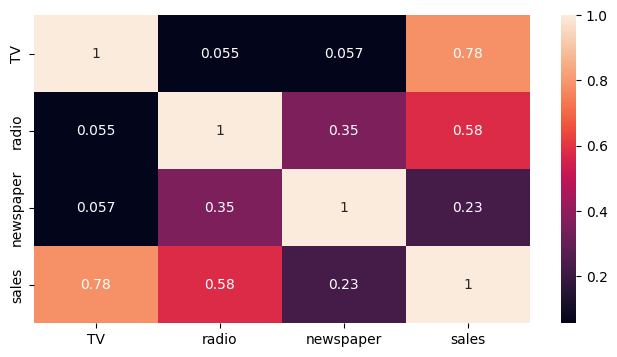

In [18]:
sns.heatmap(df.corr(), annot=True);

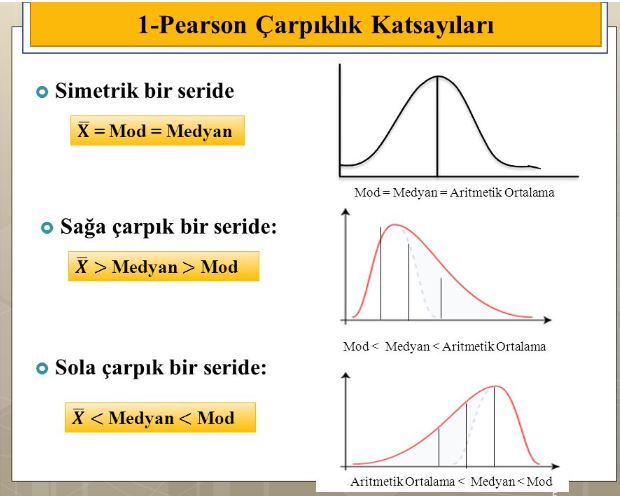

In [19]:
from scipy.stats import skew

In [20]:
# skewness tespiti için bir döngü
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

# sales sütunu haricindeki tüm feature ların skewness degerini hesaplar

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


 - -1 ile + 1 arasındaki skewness degerlerinde dagılımın kabaca simetrik oldugu kabul edilebilir

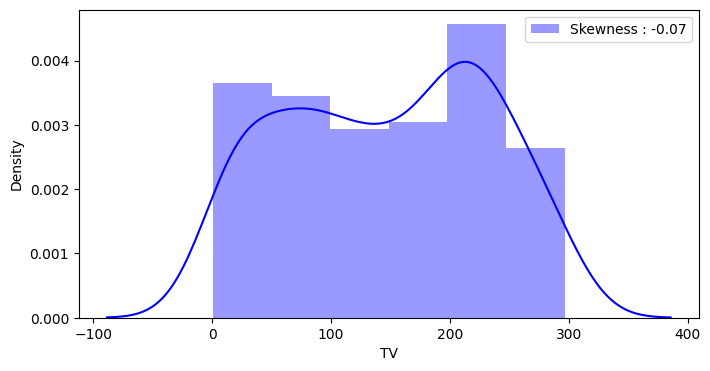

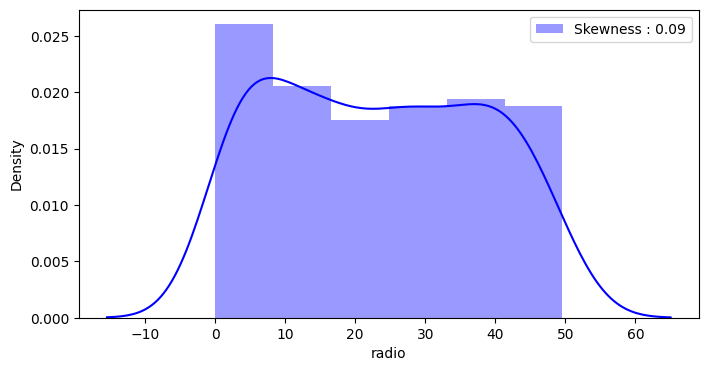

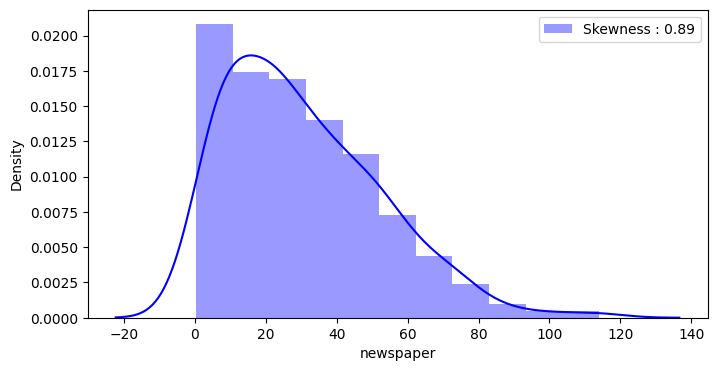

In [21]:
for j in df.drop(columns = "sales").columns:     #"sales" sütunu dataframe'den kaldırılıyor
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   #  j sütununa ait veri dağılımı grafiği çiziliyor. grafiğin üzerinde gösterilen etiketi oluşturur. Etiket, o sütunun çarpıklık değerini (skewness) içerir
    g = g.legend(loc= "best")   #  grafiğin üzerine eklenen etiketin konumunu en iyi yere yerleştirmes
    plt.show()

In [22]:
df.corr()   #correlation bakalım

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [23]:
 !pip install ipywidgets ydata-profiling

In [24]:
# load the ydata_profiling package
from ydata_profiling import ProfileReport

In [25]:
# use ProfileReport
pr_df = ProfileReport(df)

In [26]:
# show pr_df
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Train-Test Split

In [31]:
# ML için kullanılan kütüphane Scikit-Learn kütüphanesidir

# !pip install scikit-learn 
# !pip install sklearn

# Model Fitting and Compare Actual and Predicted Labels

# Error Metrics

# Adjusted R2 Score (düzeltilmiş R2 degeri)

n = gözlem sayım (data noktası sayısı) 
p = feature

Adjusted R2 = 1 - [(1 - R2) * (n - 1) / (n - p - 1)]

# Evaluation Model

In [80]:
# modelin genel degerlendirilmesini bu etapta yapacagız